# Interface

This is a python notebook that will let us interact with the our runs and models.

In [7]:
%matplotlib inline

import os
import gym
import csv
import ast
import numpy as np
import torch as th
from io import StringIO
from datetime import datetime
import json
import pickle

from Base_env import Base_env
from Basic_env import Basic_env
from Reference_env import Reference_env
from RL_env import RL_env

from stable_baselines3 import SAC
import matplotlib
import matplotlib.pyplot as plt
from run_learning import run_learning

In [18]:
def evaluate(model, param_dict, size_dynamic, size_reference):
    
    param_dict["test"] = True

    param_dict["initial_state_dynamic"] = [size_dynamic, size_dynamic]
    param_dict["initial_state_reference"] = [size_reference, size_reference]

    dynamical_env = Base_env(param_dict)
    reference_env = Reference_env(param_dict)
    test_env = RL_env(dynamical_env, reference_env, param_dict)

    obs = test_env.reset()
    done = False
    while not done:
        action, _states = model.predict(obs)
        obs, rewards, done, info = test_env.step(action)

    learned, desired, zero = test_env.render()
    
    param_dict["test"] = False
    
    plot(learned, desired, zero)
    
def plot(learned, desired, zero):
    
    fig, axs = plt.subplots(2)

    axs[0].plot(learned, label='learned')
    axs[0].plot(desired, label='desired')
    axs[0].set_title("Path")
    axs[0].legend()

    axs[1].plot(zero, label="zero")
    axs[1].set_title("Zero")

    fig.show()

In [19]:
for folder in os.listdir("./Runs"):
    folder_param_path = os.path.join(os.path.join("./Runs", folder), "param_dict.pkl")
    if os.path.exists(folder_param_path):
        with open(os.path.join(os.path.join("./Runs", folder), "param_dict.pkl"), 'rb') as f:
            param_dict = pickle.load(f)
        print(folder, " : ", param_dict["description"])

Calibration_test_nonmin_blend  :  Testing out new setup running nonmin system (b=0.5) blending weight (1, 0.2, 0)
Calibration_test_nonmin_input  :  Testing out new setup running nonmin system (b=0.5) only weighting input
Calibration_test_min_path  :  Testing out new setup running min system only weighting path
Calibration_test_min_input  :  Testing out new setup running nonmin system (b=0.5) only weighting input
Calibration_test_min_blend  :  Testing out new setup running min system blending weight (1, 0.2, 0)
Calibration_test_min_zero  :  Testing out new setup running min system only weighting zero
Calibration_test_nonmin_path  :  Testing out new setup running nonmin system (b=0.5) only weighting path
Calibration_test_nonmin_zero  :  Testing out new setup running nonmin system (b=0.5) only weighting zero


In [30]:
folder="Calibration_test_min_input"
path=os.path.join("./Runs", folder)

In [31]:
with open(os.path.join(path, "param_dict.pkl"), 'rb') as f:
        param_dict = pickle.load(f)
    
best_model = SAC.load(os.path.join(path, "best_model"))

total_timesteps = param_dict['total_timesteps']

latest_model = SAC.load(os.path.join(path, "rl_model_{}_steps".format(total_timesteps)))

param_dict

{'folder': 'Calibration_test_min_blend',
 'description': 'Testing out new setup running min system blending weight (1, 0.2, 0)',
 'dt': 0.1,
 'init_low': -3,
 'init_high': 3,
 'test': False,
 'total_time': 10,
 'total_timesteps': 100000,
 'cost_weights': [1, 0.2, 0],
 'b': -2,
 'action_high': 4,
 'action_low': -4,
 'initial_state_dynamic': [1, 1],
 'internal_matrix': [[0, -1], [1, 0]],
 'path_matrix': [0, 1],
 'initial_state_reference': [1, 1],
 'policy_kwarg': {'activation_fn': torch.nn.modules.activation.Tanh,
  'use_sde': True},
 'eval_freq': 50000,
 'save_freq': 10000,
 'gamma': 0.98}

/tmp/ipykernel_230058/1874058627.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


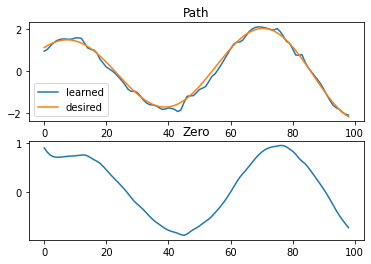

In [32]:
evaluate(latest_model, param_dict, 1, 1)

/tmp/ipykernel_230058/1874058627.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


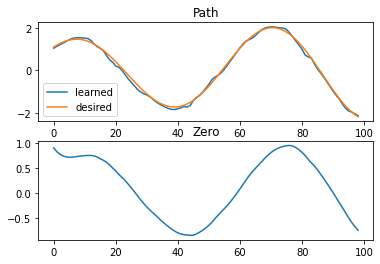

In [34]:
evaluate(best_model, param_dict, 1, 1)